## Assignment 2

In [1]:
# Get value of PUIDATA environment variable. If it's not set, set it.
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    puidata = os.environ["PUIDATA"] = "%s/PUIdata" % os.getenv("HOME")
print("PUIDATA=" + puidata)

PUIDATA=/nfshome/aaw329/PUIdata


In [2]:
# Obtain dataset from NYC OpenData (https://data.cityofnewyork.us/Environment/Current-Reservoir-Levels/zkky-n5j3)
import pandas as pd
res_lvls = pd.read_csv("https://data.cityofnewyork.us/api/views/zkky-n5j3/rows.csv")
res_lvls.head(7) # Print the first 7 rows

,Date,Ashokan East Storage,Ashokan East Elevation,Ashokan West Storage,Ashokan West Elevation,Schoharie Storage,Schoharie Elevation,Rondout Storage,Rondout Elevation,Neversink Storage,Neversink Elevation,Pepacton Storage,Pepacton Elevation,Cannonsville Storage,Cannonsville Elevation
0,11/01/2017,65.36,577.86,36.34,577.89,12.92,1109.86,47.26,835.85,30.74,1430.03,116.60,1264.45,47.69,1112.87
1,11/02/2017,64.95,577.58,36.82,578.59,13.28,1111.05,47.32,835.94,30.68,1429.90,116.87,1264.61,48.20,1113.33
2,11/03/2017,64.36,577.31,37.18,579.14,13.56,1111.97,47.22,835.79,30.72,1429.99,117.08,1264.74,48.66,1113.74
3,11/04/2017,63.71,576.94,37.49,579.56,13.78,1112.73,47.28,835.88,30.83,1430.22,117.15,1264.78,49.05,1114.09
4,11/05/2017,63.15,576.52,37.78,579.92,13.98,1113.39,47.36,836.00,30.94,1430.47,117.11,1264.76,49.35,1114.36
5,11/06/2017,62.53,576.14,38.04,580.24,14.19,1114.04,47.46,836.14,31.07,1430.75,117.23,1264.83,49.75,1114.72
6,11/07/2017,61.92,575.75,38.28,580.52,14.38,1114.66,47.50,836.21,31.19,1431.01,117.20,1264.81,50.13,1115.06


In [3]:
# Select only the second and fourth columns
res_lvls = res_lvls[[2,4]]
res_lvls.head(7)

,Ashokan East Elevation,Ashokan West Elevation
0,577.86,577.89
1,577.58,578.59
2,577.31,579.14
3,576.94,579.56
4,576.52,579.92
5,576.14,580.24
6,575.75,580.52


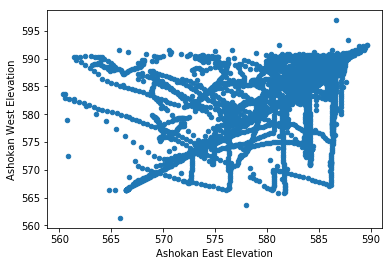

In [4]:
%matplotlib inline
res_lvls.plot(x="Ashokan East Elevation", y="Ashokan West Elevation", kind="scatter")

Figure 1: scatter plot of elevation of Ashokan East and Ashokan West reservors. There is some apparent correlation between the two, but not all of the time.

---

## Extra credit section
Try two things: accessing the dataset with the SODA API, and making a time-based plot

Data available from: https://data.cityofnewyork.us/resource/hrw9-hqf6.json

In [5]:
# Get data from the API in JSON format instead of downloading the CSV
res_lvls = pd.read_json("https://data.cityofnewyork.us/resource/hrw9-hqf6.json")
res_lvls.head(7)

,ashokan_east_elevation,ashokan_east_storage,ashokan_west_elevation,ashokan_west_storage,cannonsville_elevation,cannonsville_storage,neversink_date,neversink_elevation,neversink_storage,pepacton_elevation,pepacton_storage,rondout_elevation,rondout_storage,schoharie_elevation,schoharie_storage
0,573.43,59.02,581.71,39.30,1116.30,51.57,2017-11-13T03:00:00.000,1431.12,31.24,1264.10,116.02,835.48,47.01,1115.50,15.15
1,576.52,63.15,579.92,37.78,1114.36,49.35,2017-11-05T03:00:00.000,1430.47,30.94,1264.76,117.11,836.00,47.36,1113.39,13.98
2,577.58,64.95,578.59,36.82,1113.33,48.20,2017-11-02T04:00:00.000,1429.90,30.68,1264.61,116.87,835.94,47.32,1111.05,13.28
3,576.14,62.53,580.24,38.04,1114.72,49.75,2017-11-06T03:00:00.000,1430.75,31.07,1264.83,117.23,836.14,47.46,1114.04,14.19
4,571.67,56.08,583.64,41.23,1116.08,51.32,2017-11-20T03:00:00.000,1432.49,31.88,1263.84,115.60,835.45,46.99,1117.23,15.22
5,570.62,54.54,584.55,42.05,1116.04,51.27,2017-11-23T03:00:00.000,1432.75,32.00,1263.82,115.55,835.46,47.00,1117.41,15.25
6,574.96,60.76,581.00,38.71,1115.55,50.68,2017-11-09T03:00:00.000,1431.37,31.37,1264.56,116.78,836.15,47.46,1115.69,14.71


In [6]:
# Select 0th, 2nd, and 6th columns
res_lvls = res_lvls[[0,2,6]]
# Sort by date since that's what we'll be plotting by
res_lvls = res_lvls.sort_values(by="neversink_date")  
# Rename labels for a friendlier-looking plot
res_lvls = res_lvls.rename(index=str, columns={"ashokan_east_elevation": "Ashokan East Elevation", 
                                               "ashokan_west_elevation": "Ashokan West Elevation",
                                               "neversink_date": "Date"})  
# Converting the "Date" column with the pd.Timestamp() function makes the dates look much better too
res_lvls["Date"] = res_lvls["Date"].apply(lambda x: pd.Timestamp(x))  
res_lvls.head(7)

,Ashokan East Elevation,Ashokan West Elevation,Date
409,587.64,590.13,2006-01-04 19:00:00
62,587.65,590.32,2006-01-11 19:00:00
385,587.75,590.38,2006-01-12 19:00:00
256,588.05,590.83,2006-01-20 19:00:00
795,586.98,589.58,2006-02-01 19:00:00
41,587.81,590.53,2006-02-02 19:00:00
628,587.73,590.40,2006-02-08 19:00:00


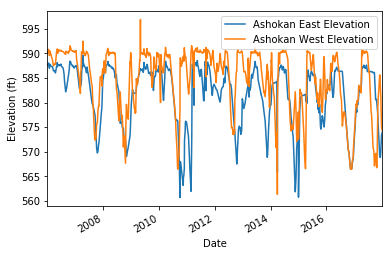

In [7]:
plot = res_lvls.plot.line(y=["Ashokan East Elevation", "Ashokan West Elevation"], x="Date")
plot.set_ylabel("Elevation (ft)")
plot

Figure 2: line plot of elevations of Ashokan East and Ashokan West reservoirs over time. One can see that the elevations of the two are often, but not always, correlated.